In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to the ZIP file in your Drive
zip_path = "/content/drive/MyDrive/Rice_Leaf_AUG.zip"  # update path if needed

# Extract it to current working directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(".")

# Check folder content
print("Extracted folders:")
print(os.listdir("Rice_Leaf_AUG"))


ValueError: mount failed

Categories found: ['Healthy Rice Leaf', 'Bacterial Leaf Blight', 'Sheath Blight', 'Brown Spot', 'Leaf scald', 'Rice Hispa', 'Narrow Brown Leaf Spot', 'Neck_Blast', 'Leaf Blast']


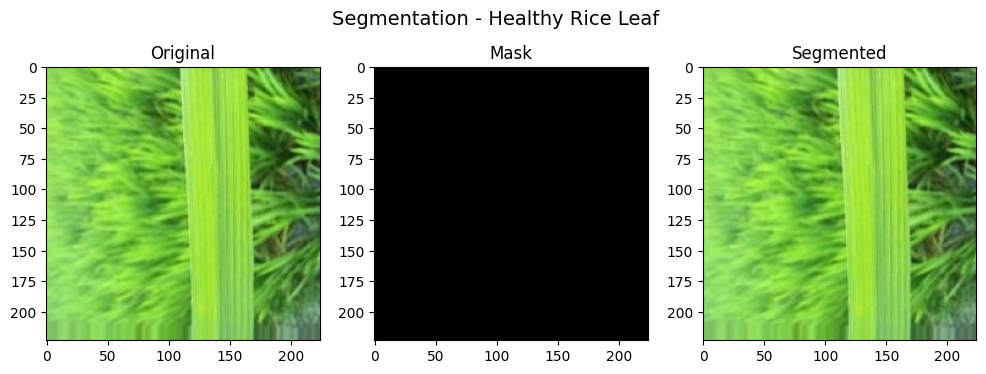

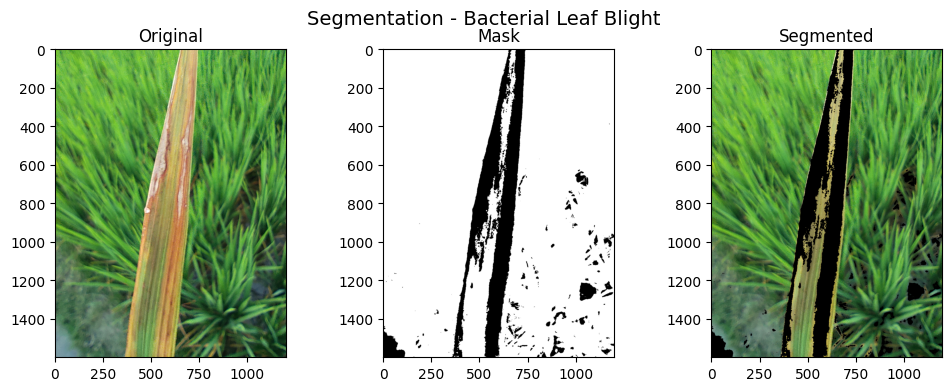

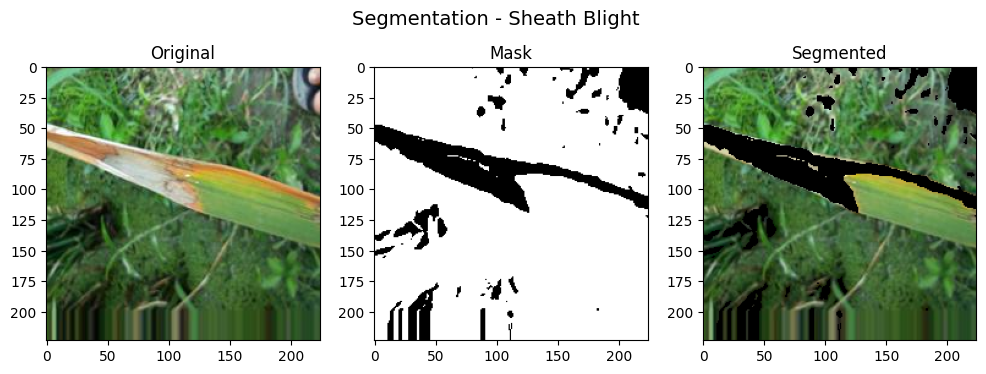

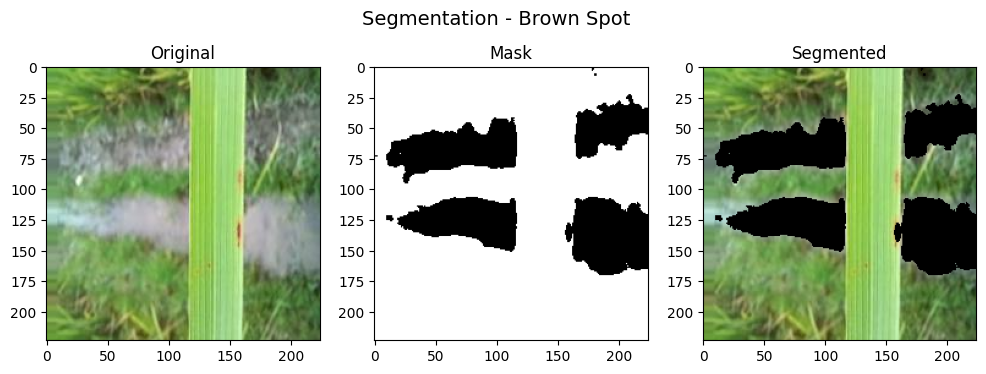

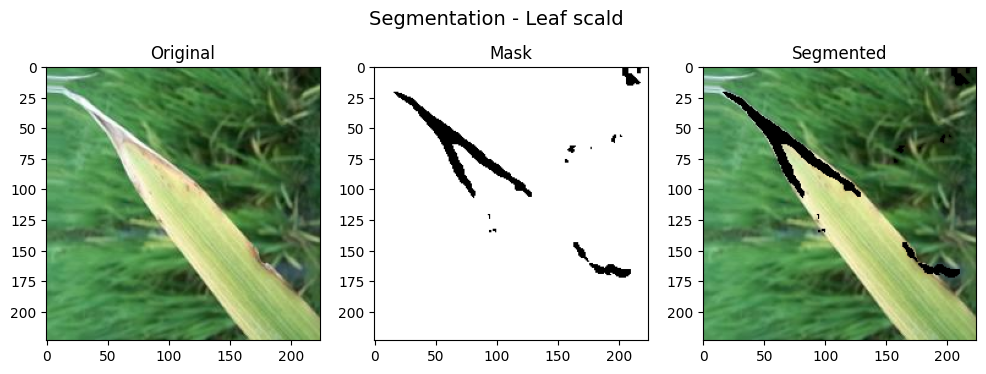

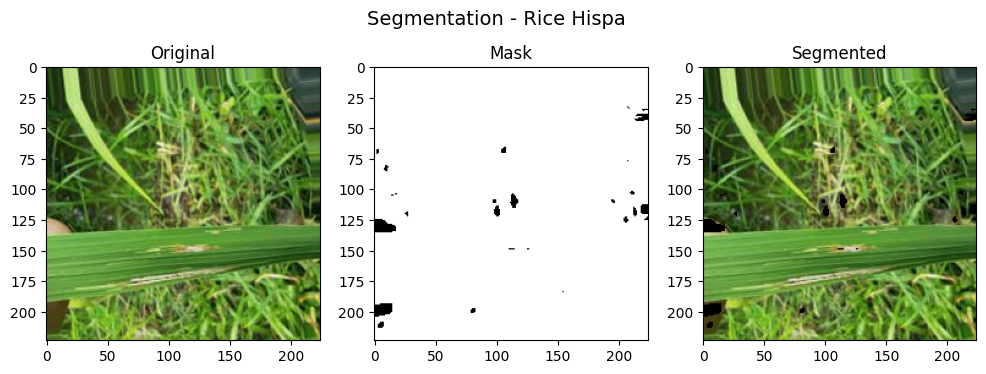

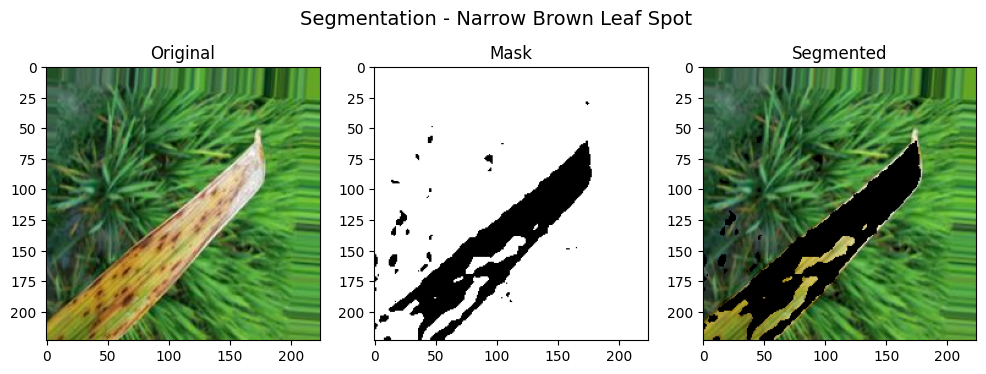

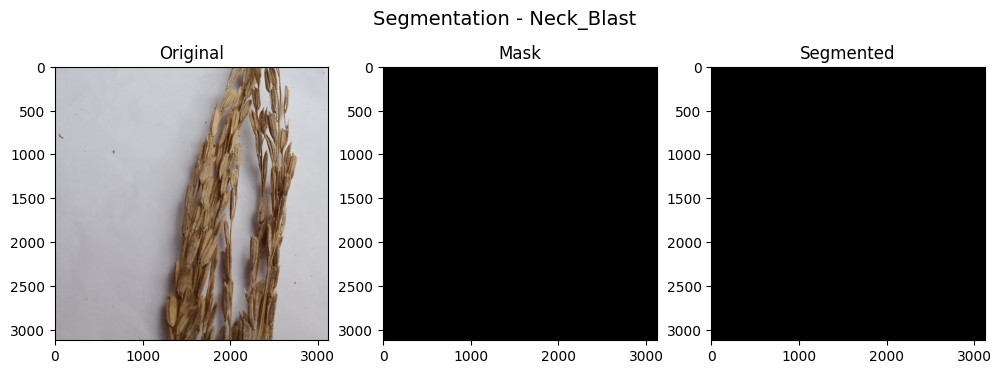

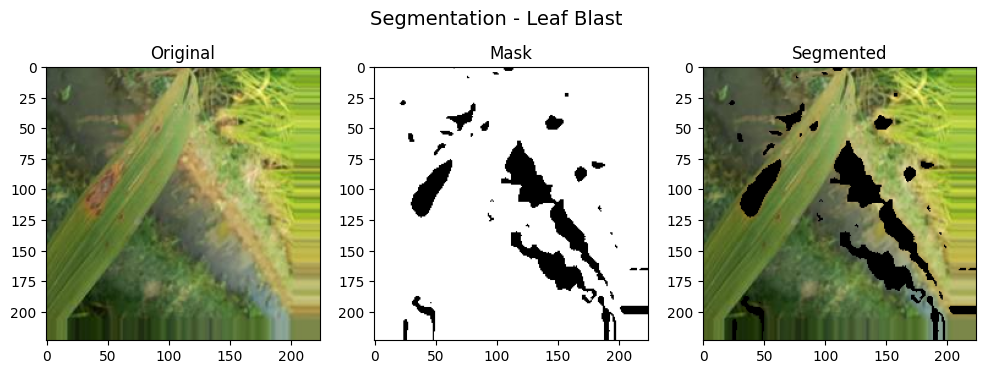

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob

# Set path to dataset
base_path = "Rice_Leaf_AUG"

# Auto-detect all disease categories in the folder
categories = os.listdir(base_path)
print("Categories found:", categories)

# Segmentation function (color masking)
def segment_leaf(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Smoothing
    img_blur = cv2.GaussianBlur(img_rgb, (5, 5), 0)

    # Convert to HSV
    hsv = cv2.cvtColor(img_blur, cv2.COLOR_RGB2HSV)

    # Define green color range in HSV (adjust if needed)
    lower_green = np.array([25, 40, 40])
    upper_green = np.array([85, 255, 255])

    # Create mask
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Bitwise AND to get segmented part
    segmented = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

    return img_rgb, mask, segmented

# Display 1 sample segmentation per category
for category in categories:
    folder_path = os.path.join(base_path, category)
    image_files = glob(os.path.join(folder_path, "*.jpg"))  # You can also try "*.png" if needed

    if image_files:
        img_path = image_files[0]  # Taking first image
        original, mask, segmented = segment_leaf(img_path)

        plt.figure(figsize=(12, 4))
        plt.suptitle(f"Segmentation - {category}", fontsize=14)

        plt.subplot(1, 3, 1)
        plt.imshow(original)
        plt.title("Original")

        plt.subplot(1, 3, 2)
        plt.imshow(mask, cmap='gray')
        plt.title("Mask")

        plt.subplot(1, 3, 3)
        plt.imshow(segmented)
        plt.title("Segmented")

        plt.show()


In [ ]:
save_dir = "Segmented_Images"
os.makedirs(save_dir, exist_ok=True)

for category in categories:
    input_folder = os.path.join(base_path, category)
    output_folder = os.path.join(save_dir, category.replace(" ", "_"))
    os.makedirs(output_folder, exist_ok=True)

    image_files = glob(os.path.join(input_folder, "*.jpg"))
    for img_file in image_files:
        _, _, segmented = segment_leaf(img_file)
        filename = os.path.basename(img_file)
        save_path = os.path.join(output_folder, filename)
        cv2.imwrite(save_path, cv2.cvtColor(segmented, cv2.COLOR_RGB2BGR))


KeyboardInterrupt: 

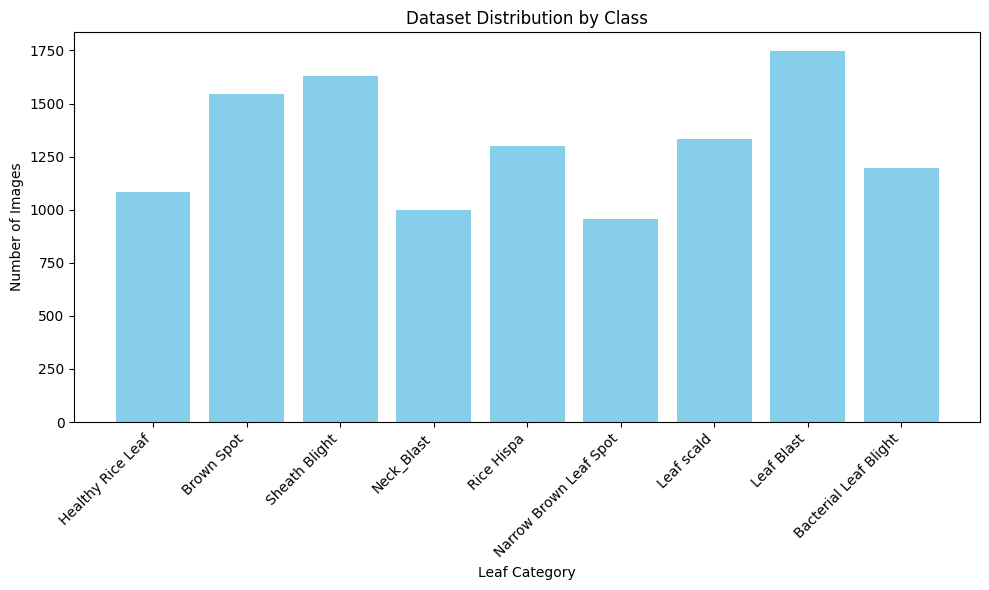

In [ ]:
import matplotlib.pyplot as plt

# Count number of images in each category
category_counts = {cat: len(glob(os.path.join(base_path, cat, "*.jpg"))) for cat in categories}

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(category_counts.keys(), category_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Leaf Category")
plt.ylabel("Number of Images")
plt.title("Dataset Distribution by Class")
plt.tight_layout()
plt.show()


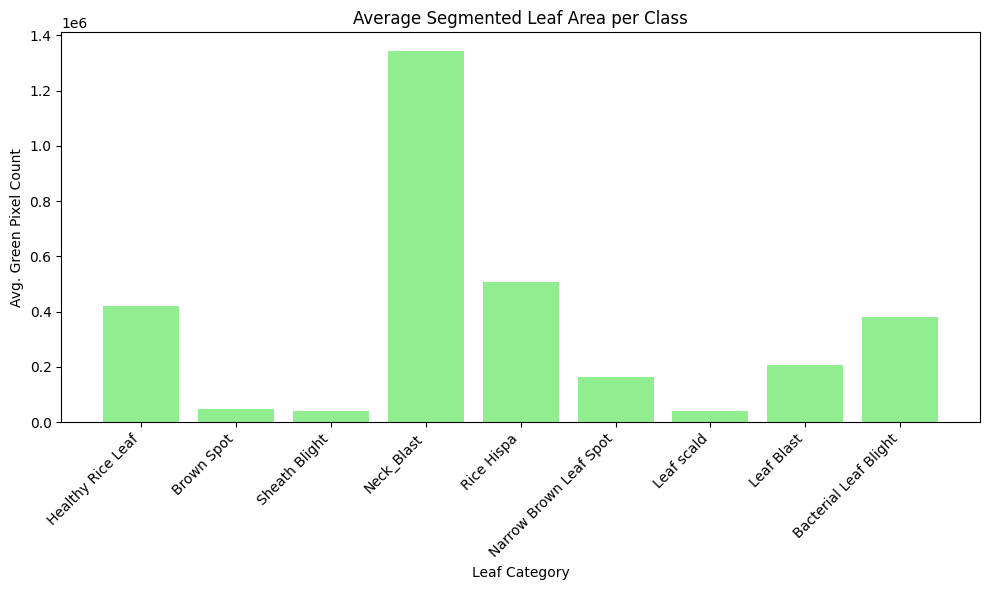

In [ ]:
green_area = {}

for category in categories:
    folder_path = os.path.join(base_path, category)
    image_files = glob(os.path.join(folder_path, "*.jpg"))

    green_pixel_counts = []

    for img_file in image_files[:10]:  # Taking only first 10 for speed
        _, mask, _ = segment_leaf(img_file)
        green_pixels = np.count_nonzero(mask)  # Count white pixels (leaf areas)
        green_pixel_counts.append(green_pixels)

    green_area[category] = np.mean(green_pixel_counts)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(green_area.keys(), green_area.values(), color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Leaf Category")
plt.ylabel("Avg. Green Pixel Count")
plt.title("Average Segmented Leaf Area per Class")
plt.tight_layout()
plt.show()


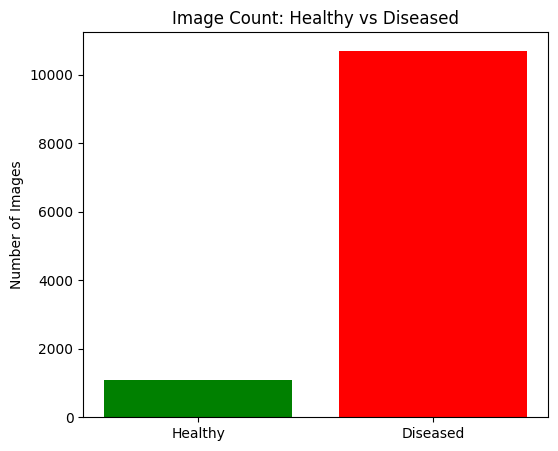

In [ ]:
# Separate healthy and diseased
healthy_class = "Healthy Rice Leaf"
diseased_classes = [cat for cat in categories if cat != healthy_class]

# Count images
healthy_count = len(glob(os.path.join(base_path, healthy_class, "*.jpg")))
diseased_count = sum(len(glob(os.path.join(base_path, cat, "*.jpg"))) for cat in diseased_classes)

# Plot
plt.figure(figsize=(6, 5))
plt.bar(["Healthy", "Diseased"], [healthy_count, diseased_count], color=["green", "red"])
plt.ylabel("Number of Images")
plt.title("Image Count: Healthy vs Diseased")
plt.show()


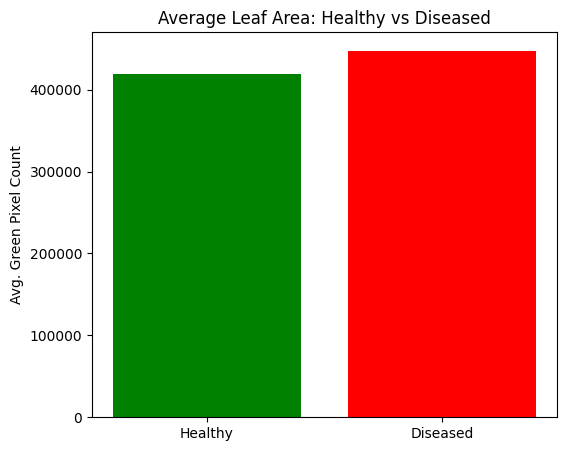

In [ ]:
# Calculate green area for Healthy
healthy_pixels = []
for img_file in glob(os.path.join(base_path, healthy_class, "*.jpg"))[:10]:
    _, mask, _ = segment_leaf(img_file)
    healthy_pixels.append(np.count_nonzero(mask))

# Calculate green area for all diseased categories
diseased_pixels = []
for cat in diseased_classes:
    for img_file in glob(os.path.join(base_path, cat, "*.jpg"))[:3]:  # 3 per disease (speed)
        _, mask, _ = segment_leaf(img_file)
        diseased_pixels.append(np.count_nonzero(mask))

# Plot
plt.figure(figsize=(6, 5))
plt.bar(["Healthy", "Diseased"],
        [np.mean(healthy_pixels), np.mean(diseased_pixels)],
        color=["green", "red"])
plt.ylabel("Avg. Green Pixel Count")
plt.title("Average Leaf Area: Healthy vs Diseased")
plt.show()


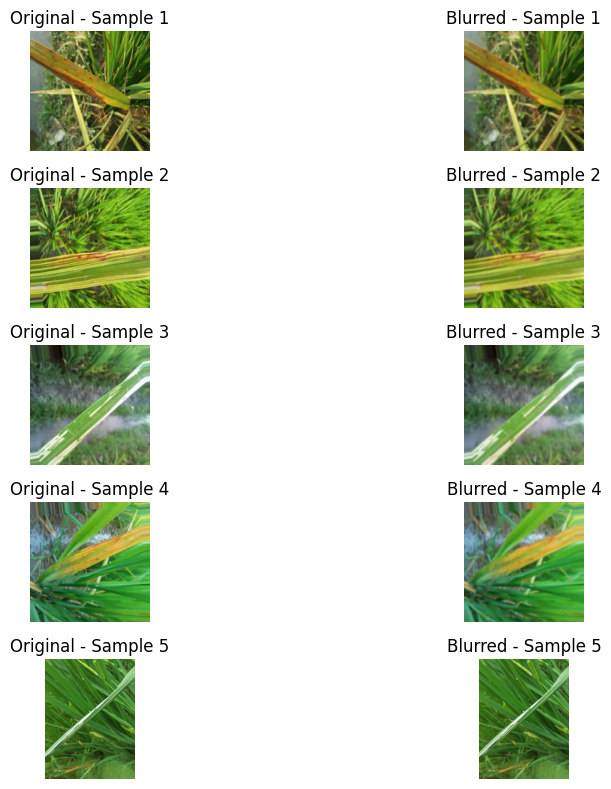

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import random

# Assuming 'base_path' is already defined (from your previous code)
base_path = "Rice_Leaf_AUG"

# Get a list of all image paths
all_image_paths = []
for category in os.listdir(base_path):
    folder_path = os.path.join(base_path, category)
    all_image_paths.extend(glob(os.path.join(folder_path, "*.jpg")))

# Randomly select 5 image paths (to display 5 pairs)
sample_image_paths = random.sample(all_image_paths, 5)

# Apply Gaussian blur and display alongside original
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
for i, img_path in enumerate(sample_image_paths):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply Gaussian Blur
    blurred_img = cv2.GaussianBlur(img_rgb, (5, 5), 0)

    # Display original and blurred images side-by-side
    plt.subplot(5, 2, 2*i + 1)  # 5 rows, 2 columns
    plt.imshow(img_rgb)
    plt.title(f"Original - Sample {i + 1}")
    plt.axis('off')

    plt.subplot(5, 2, 2*i + 2)
    plt.imshow(blurred_img)
    plt.title(f"Blurred - Sample {i + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()